## **Context**
In this notebook, I will explore and predict Avocado Sales Data spanning from 2025 to 2021, focusing on sales within the United States. The process begins with importing the dataset and necessary libraries, followed by data cleaning and feature engineering. After that, I delve into exploring the avocado sales dataset. Finally, I construct a regression machine learning model and conduct a side-by-side comparison with another model to determine the model with higher accuracy.

## **Import Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/avocado-sales-20152021-us-centric/avocado cleaned.csv


## **Understanding The Dataset**

In [2]:
avocado = pd.read_csv("/kaggle/input/avocado-sales-20152021-us-centric/avocado cleaned.csv")
avocado.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/11/2015,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
3,1/11/2015,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
4,1/18/2015,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany


In [3]:
avocado.shape

(41025, 13)

In [4]:
avocado.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41025 entries, 0 to 41024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          41025 non-null  object 
 1   AveragePrice  41025 non-null  float64
 2   TotalVolume   41025 non-null  float64
 3   plu4046       41025 non-null  float64
 4   plu4225       41025 non-null  float64
 5   plu4770       41025 non-null  float64
 6   TotalBags     41025 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          41025 non-null  object 
 11  year          41025 non-null  int64  
 12  region        41025 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# check for missing values
avocado.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [7]:
avocado.describe()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,41025.000000,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,41025.000000,41025.000000
mean,1.423629,8.642940e+05,2.749467e+05,2.345652e+05,1.836267e+04,2.105351e+05,1.039222e+05,2.331316e+04,2731.811796,2018.039025
std,0.394518,3.535861e+06,1.204237e+06,1.004236e+06,8.902499e+04,8.522421e+05,5.692608e+05,1.496622e+05,22589.096454,1.976821
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.113394,1.488866e+04,5.887900e+02,2.019520e+03,0.000000e+00,7.096130e+03,0.000000e+00,0.000000e+00,0.000000,2016.000000
50%,1.393412,1.174475e+05,1.052854e+04,1.810527e+04,1.171100e+02,3.492300e+04,6.945800e+02,0.000000e+00,0.000000,2018.000000
75%,1.690000,4.450730e+05,1.131644e+05,9.853965e+04,3.801090e+03,1.047044e+05,3.795298e+04,2.814920e+03,0.000000,2020.000000
max,3.250000,6.103446e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000,2021.000000


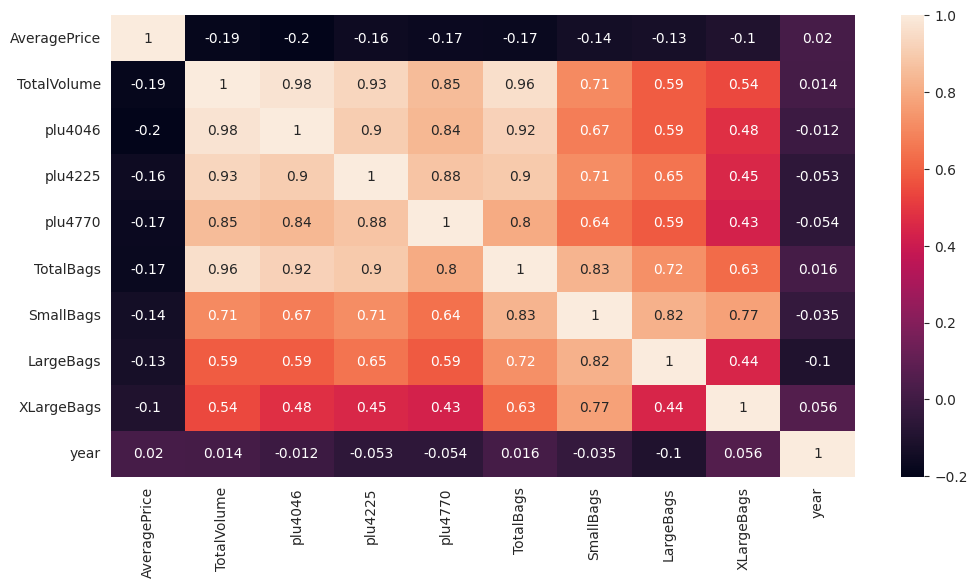

In [8]:
# dataset correlation matrix
corr = avocado.corr(numeric_only=True)

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.show()

## **Feature Engineering**

In [9]:
#drop TotalUS from dataset
avocado = avocado[avocado["region"]!="TotalUS"] 

In [10]:
# change Date dtype to datetime
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['Month'] = avocado['Date'].apply(lambda x:x.month)
avocado['Day'] = avocado['Date'].apply(lambda x:x.day)

In [11]:
# create total_sales feature
avocado['total_sales'] = avocado['AveragePrice']*avocado['TotalVolume']

In [12]:
# turn avocado type to lowercase
avocado["type"] = avocado["type"].apply(lambda x:x.lower())

In [13]:
# export dataset to csv
# avocado.to_csv("avocado_final.csv", index=False)

## **Data Exploratory**

### 1. How has the average avocado price changed over the years (2015-2021)?

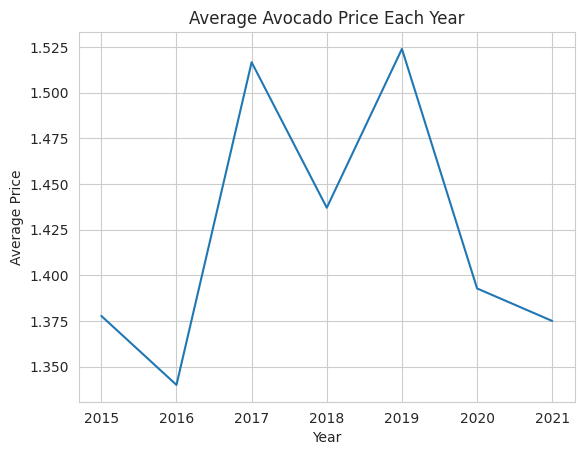

In [14]:
avocado_avg_price = avocado.groupby("year")["AveragePrice"].mean().reset_index(name="avg_price")

# Plot the average avocado price
sns.lineplot(data=avocado_avg_price, x="year", y="avg_price")
plt.title("Average Avocado Price Each Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

> The average price of avocados fluctuated over the years. The highest prices were in 2017 and 2019 at around \\$1.51 while the lowest was in 2016 at $1.33. 

### 2. What is the overall trend in total avocado volume sold from 2015 to 2021?

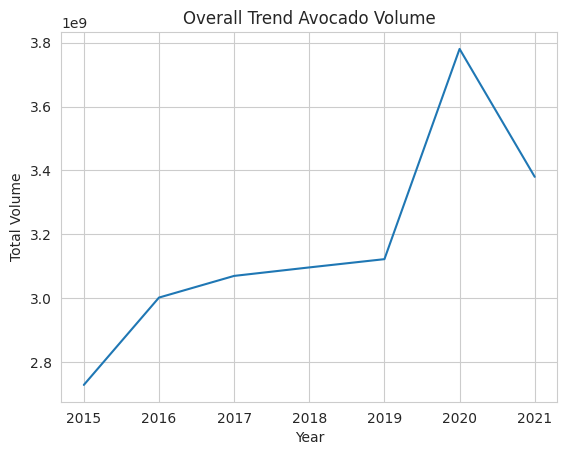

In [15]:
avocado_volume = avocado.groupby("year")["TotalVolume"].sum().reset_index(name="total_volume")

# Plot the total avocado volume
sns.lineplot(data=avocado_volume, x="year", y="total_volume")
plt.title("Overall Trend Avocado Volume")
plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.show()

> There is an upward trend observed each year, reaching its peak in 2020 with a total volume of 3,780,405,000.

### 3. Which type of avocados (organic or conventional) has a higher average price?

In [16]:
avocado_type = avocado.groupby("type")["AveragePrice"].mean().reset_index(name="avg_price")
avocado_type

,type,avg_price
0,conventional,1.161102
1,organic,1.688095


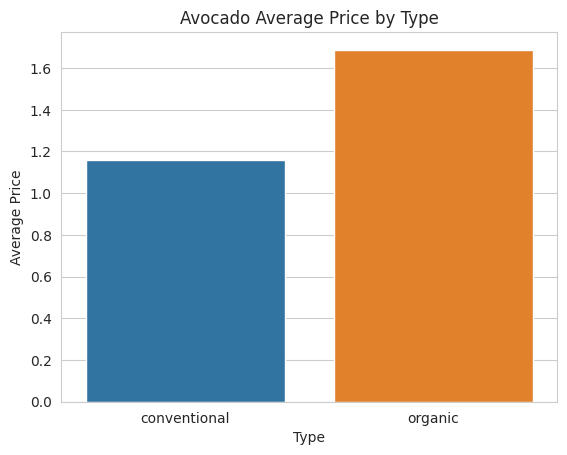

In [17]:
ax = sns.barplot(data=avocado_type, x="type", y="avg_price")
plt.title("Avocado Average Price by Type")
plt.xlabel("Type")
plt.ylabel("Average Price")
plt.show()

> Avocado organic type has the higher average price for \\$1.68, while the conventional type is $1.16

### 4. Which type of avocados (organic or conventional) has the most demand?

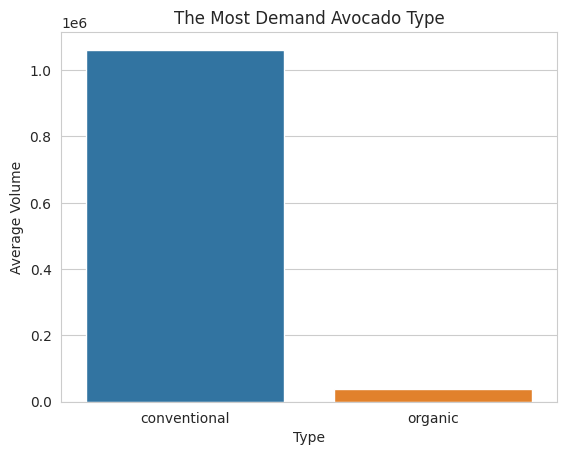

In [18]:
avocado_volume = avocado.groupby("type")["TotalVolume"].mean().reset_index(name="avg_volume")

sns.barplot(data=avocado_volume, x="type", y="avg_volume")
plt.title("The Most Demand Avocado Type")
plt.xlabel("Type")
plt.ylabel("Average Volume")
plt.show()

> Conventional type of avocado has the most demand than organic type. </br> 
 Average volume for conventional - 1,061,670,000 </br>
 Average volume for organic - 38,821.56

### 5. What is the distribution of avocado sales across different regions?

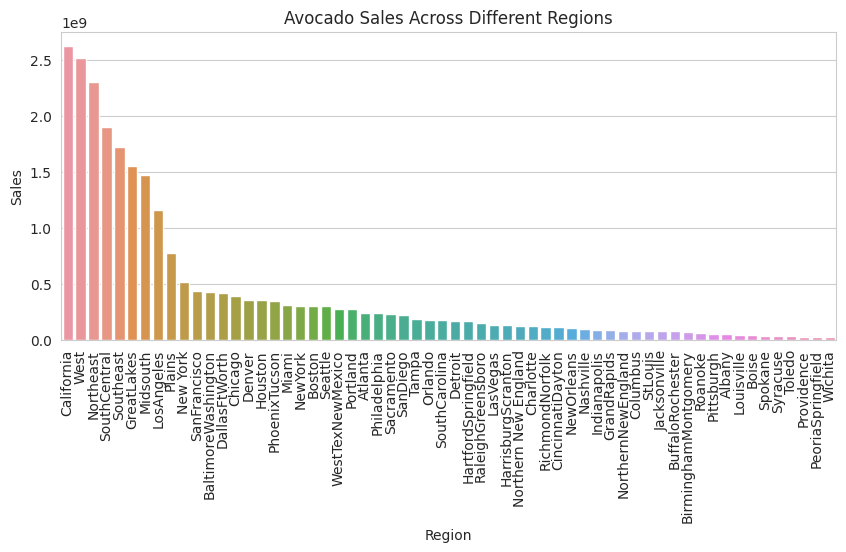

In [19]:
region = avocado.groupby("region")["total_sales"].sum().reset_index(name="sales")
region_sorted = region.sort_values(by="sales", ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(data=region_sorted, x="region", y="sales")
plt.title("Avocado Sales Across Different Regions")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

> California dominates avocado sales with around $2.62 billion, followed by strong sales in the West and Northeast regions. 

### 6. Are there any seasonal patterns in avocado sales throughout the year?

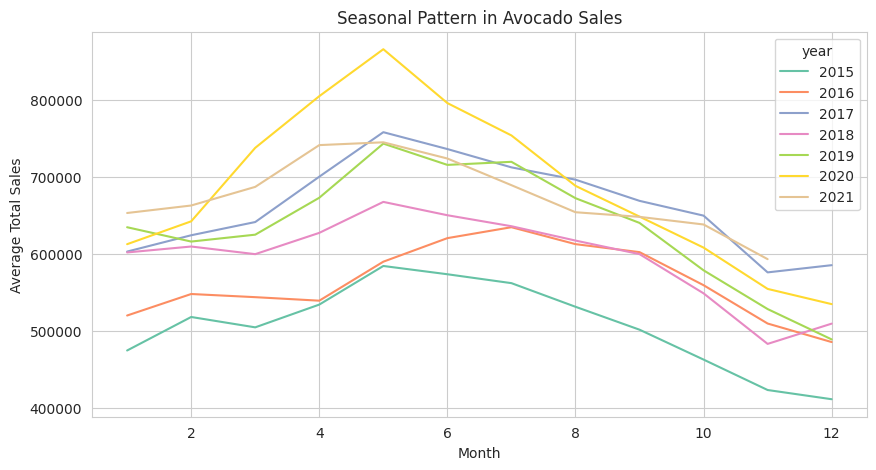

In [20]:
# Group by month and calculate the average total sales for each month
avocado_sales = avocado.groupby(['year','Month'])['total_sales'].mean().reset_index(name="total_sales")
avocado_sales

# Plot total sales each year
plt.figure(figsize=(10,5))
sns.lineplot(data=avocado_sales, x='Month', y='total_sales', hue='year', palette="Set2")
plt.title('Seasonal Pattern in Avocado Sales')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.show()

> According to the provided chart, there is an annual seasonal pattern observed. Generally, May consistently records the highest sales, while November and Desember consistently reports the lowest sales each year.

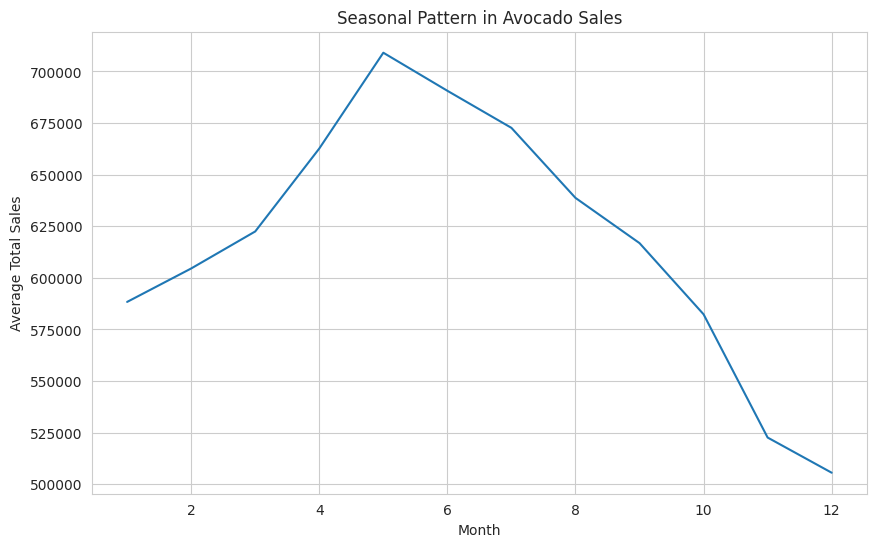

In [21]:
# Group by month and calculate the average total sales for each month
monthly_avg_sales = avocado.groupby('Month')['total_sales'].mean()

# Plot the seasonal pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values)
plt.title('Seasonal Pattern in Avocado Sales')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.show()

### 7. Which year had the highest total avocado sales?

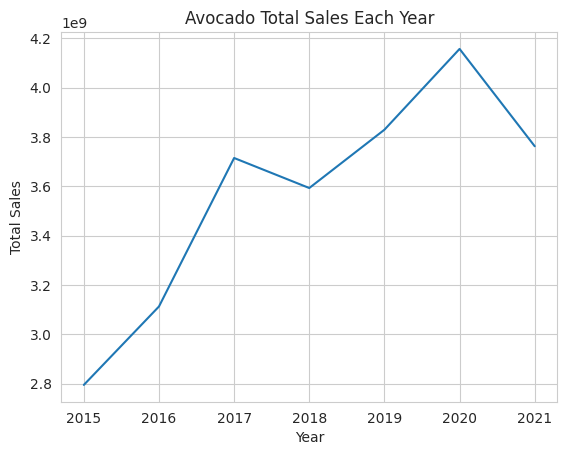

In [22]:
avocado_sales = avocado.groupby("year")["total_sales"].sum().reset_index(name="total_sales")

sns.lineplot(data=avocado_sales, x="year", y="total_sales")
plt.title("Avocado Total Sales Each Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


> The peak year for avocado sales was 2020, reaching a total of $6.58 billion.

### 8. What is the top 5 regions with the highest average price?

In [23]:
avg_price = avocado.groupby("region")["AveragePrice"].mean().reset_index(name="average_price")
avg_price_sorted = avg_price.sort_values(by="average_price", ascending=False)
avg_price_sorted[:5]

,region,average_price
41,Providence,1.785801
18,HartfordSpringfield,1.776604
47,SanFrancisco,1.768371
30,NewYork,1.739268
45,Sacramento,1.623543


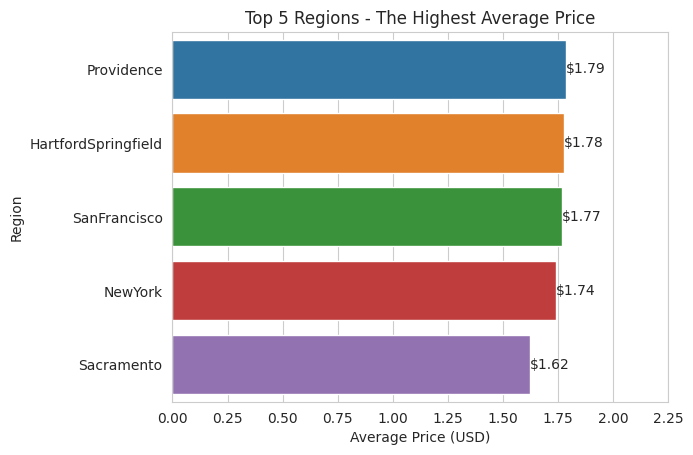

In [24]:
ax = sns.barplot(data=avg_price_sorted[:5], x="average_price",y="region")
# Add labels to bars
for p in ax.patches:
    ax.annotate(f'${p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')
    
plt.title("Top 5 Regions - The Highest Average Price")
plt.xlabel("Average Price (USD)")
plt.ylabel("Region")
plt.xlim(0,2.25)
plt.show()

> Providence tops the list with the highest average avocado price at \\$1.79, followed by Hartford-Springfield (\\$1.78), San Francisco (\\$1.77), New York (\\$1.74), and Sacramento (\\$1.62). 

### 9. What is the top 5 regions with the highest volume demand?

In [25]:
data = avocado.groupby("region")["TotalVolume"].sum().reset_index(name="total_volume")
data_sorted = data.sort_values(by="total_volume", ascending=False)[:5]

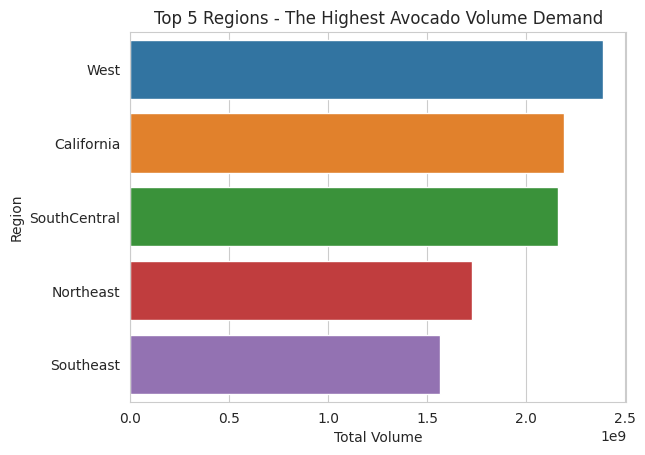

In [26]:
sns.barplot(data=data_sorted, x='total_volume',y='region')
plt.title("Top 5 Regions - The Highest Avocado Volume Demand")
plt.xlabel("Total Volume")
plt.ylabel("Region")
plt.show()

> Top 5 regions by avocado volume demand are West (2.39 billion), California (2.19 billion), South Central (2.16 billion), Northeast (1.73 billion), and Southeast (1.56 billion).

### 10. Is there a correlation between the type of avocados and the size of bags sold (SmallBags, LargeBags, XLargeBags)?

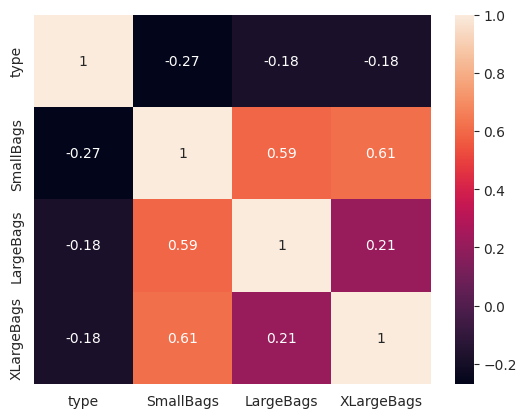

In [27]:
avocado_corr = avocado.copy()
avocado_corr["type"] = avocado_corr["type"].replace({"conventional":0, "organic":1})

corr = avocado_corr[["type","SmallBags","LargeBags","XLargeBags"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

> Based on the correlation matrix above, there is no correlation between the type of avocados and the size of bags sold.

## **ML Model**

In [28]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(avocado.drop(["Date","AveragePrice","year","region","Month","Day","total_sales"], axis=1)).astype(int) # features
y = avocado[["AveragePrice"]] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# define a function to evaluate the model prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

summary = []
def evaluate_model(ml_model, test, pred):
    model = {}
    model['model'] = ml_model
    model['mae'] = mean_absolute_error(test,pred)
    model['mse'] = mean_squared_error(test,pred)
    model['rmse'] = np.sqrt(model['mse'])
    model['r2'] = r2_score(test,pred)
    summary.append(model)
    
    print(f'MAE: %.4f' % model['mae'])
    print(f'MSE: %.4f' % model['mse'])
    print(f'RMSE: %.4f' % model['rmse'])
    print(f'R2 Score: %.4f' % model['r2'])
    
    # plot the y_test y_pred
    plt.scatter(test,pred)
    plt.title(f"{ml_model} y_test vs y_pred")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    filename = f"plot_{ml_model}.png"
    # plt.savefig(filename, bbox_inches="tight")
    plt.show()

### Linear Regression

MAE: 0.2238
MSE: 0.0841
RMSE: 0.2900
R2 Score: 0.4534


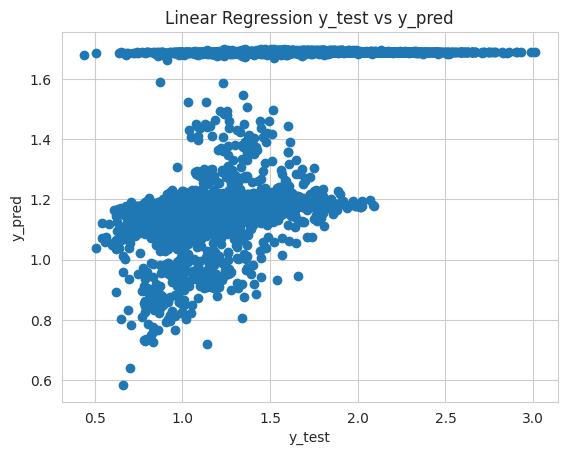

In [30]:
# create and training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr_fit.predict(X_test)

# evaluate the model
evaluate_model('Linear Regression', y_test, y_pred)

### Decision Tree Regression

MAE: 0.1732
MSE: 0.0669
RMSE: 0.2586
R2 Score: 0.5652


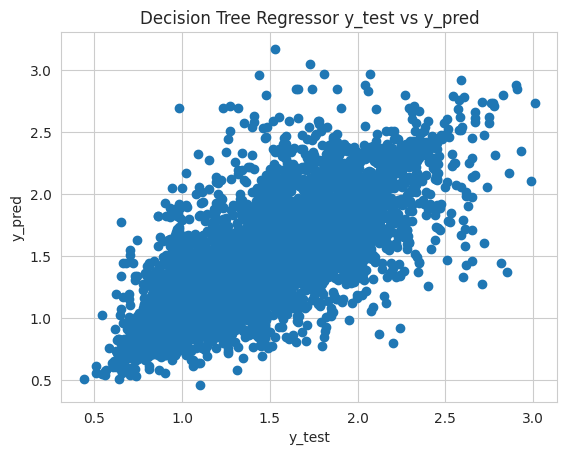

In [31]:
# create and training the model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_fit = dtr.fit(X_train, y_train)
y_pred = dtr_fit.predict(X_test)

# evaluate the model
evaluate_model('Decision Tree Regressor', y_test, y_pred)

### Random Forest Regression

MAE: 0.1259
MSE: 0.0311
RMSE: 0.1764
R2 Score: 0.7978


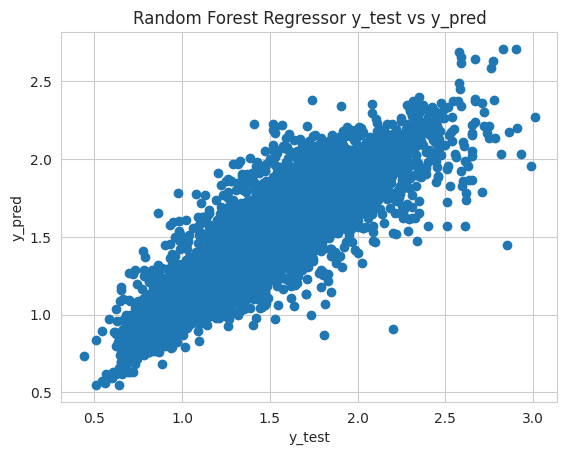

In [32]:
# create and training the model
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr_fit = rdr.fit(X_train, y_train)
y_pred = rdr_fit.predict(X_test)

# evaluate the model
evaluate_model('Random Forest Regressor', y_test, y_pred)

## **Conclusion**

In [33]:
pd.DataFrame(summary).sort_values(by='mse')

,model,mae,mse,rmse,r2
2,Random Forest Regressor,0.125929,0.031102,0.176359,0.797825
1,Decision Tree Regressor,0.173161,0.066889,0.258630,0.565199
0,Linear Regression,0.223791,0.084081,0.289968,0.453445


In conclusion, the Random Forest Regressor outperforms the other models with the lowest errors (MAE, MSE, RMSE) and the highest accuracy (r2). It proves to be the most effective in predicting avocado sales data compared to the Decision Tree Regressor and Linear Regression models.